In [1]:
import json
with open("../dataset/layers/layer4.json", "r") as f:
    dataset = json.load(f)

In [42]:
dataset[5]

['freshgarlic',
 'blackpepper',
 'lemonjuice',
 'soysauce',
 'groundbeef',
 'cashews',
 'pineapple',
 'shreddedcoconut',
 'cornstarch',
 'mandarinorange']

In [2]:
# j_f = []
# for rec in dataset:
#     vi = []
#     for i in range(len(rec["ingredients"])):
#         if rec["valid"][i]:
#             if rec["ingredients"][i]["text"] not in vi:
#                 vi.append(rec["ingredients"][i]["text"])
#     xx = {"id": rec["id"], "ingredients": vi}
#     j_f.append(xx)

In [3]:
# ingredients_per_recipe = [x['ingredients'] for x in j_f]

In [3]:
corpus = [' '.join(ingredients) for ingredients in dataset]

In [44]:
corpus[0]

'freshgarlic blackpepper lemonjuice soysauce groundbeef cashews pineapple shreddedcoconut cornstarch mandarinorange'

In [4]:
# ingredients_per_recipe = [' '.join([''.join(ingredient.split()) for ingredient in recipe]) for recipe in ingredients_per_recipe]

In [5]:
# ingredients_per_recipe[0]

'penne cheesesauce cheddarcheese gruyerecheese driedchipotlepowder unsaltedbutter all-purposeflour milk koshersalt garlicpowder'

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [6]:
# corpus = ingredients_per_recipe
X = vectorizer.fit_transform(corpus)

In [7]:
type(X)

scipy.sparse.csr.csr_matrix

In [8]:
corpus_len = len(corpus)

In [9]:
from scipy.sparse import find

Steps:
1. Transform all ingredients lists into vectors using bag of words technique
2. Take user's input ingredients and turn them into a vector the same way
3. Do a scalar product of user's ingredient vector and the corpus matrix, and take the max results to find K nearest neighbours (K nearest recipes by ingredients)
4. Find all the overlapping ingredients from user's ingredients and the K nearest recipes' ingredients and use them as a subset

In [103]:
import numpy as np
n = 25
my_ingredients_string = "milk gruyerecheese tacochips garlicpowder cucumber seedlesswatermelon freshgarlic blackpepper lemonjuice soysauce groundbeef cashews pineapple shreddedcoconut cornstarch mandarinorange"
my_ingredients_list = set(my_ingredients_string.split(" "))
my_vector = vectorizer.transform([my_ingredients_string])[0]
scalar_products = X.multiply(my_vector).sum(1)
knn = np.squeeze(np.asarray(scalar_products.reshape((corpus_len)))).argsort()[-n:]
all_overlapping = {}
for nearest in knn:
    found_ingredients_indices = find(X[nearest])[1]
    for index in found_ingredients_indices:
        ingredient = vectorizer.get_feature_names()[index]
        if ingredient in my_ingredients_list:
            all_overlapping[ingredient] = all_overlapping.get(ingredient, 0) + 1
best_ingredients = list(all_overlapping.keys())
print(best_ingredients)
print(f'Number of starting ingredients: {len(my_ingredients_list)}')
print(f'Number of chosen ingredients: {len(best_ingredients)}')

['blackpepper', 'cornstarch', 'freshgarlic', 'garlicpowder', 'cashews', 'groundbeef', 'lemonjuice', 'mandarinorange', 'pineapple', 'shreddedcoconut', 'soysauce', 'tacochips', 'milk']
Number of starting ingredients: 16
Number of chosen ingredients: 13


### Evaluating the algorithm

In [118]:
test_data = [
    {'all_ingredients': ['groundwalnuts', 'powderedsugar', 'sugar', 'vanilla', 'cookie', 'water', 'rum', 'potato', 'cucumber', 'pumpkinseeds'],
     'subset': ['groundwalnuts', 'powderedsugar', 'sugar', 'vanilla', 'cookie', 'water', 'rum']},
    {'all_ingredients': ['bakingsoda', 'vanilla', 'cookie', 'sugar', 'water', 'buttermilk', 'Crisco', 'milk', 'salt', 'vanilla', 'egg', 'flour', 'meat', 'mayonnaise', 'pear'],
     'subset': ['bakingsoda', 'vanilla', 'cookie', 'sugar', 'water', 'buttermilk', 'Crisco', 'milk', 'salt', 'vanilla', 'egg', 'flour']},
    {'all_ingredients': ['egg', 'milk', 'tomatojuice', 'flour', 'oats', 'salt', 'cheese', 'redpepper', 'Mexican-stylecorn', 'pepper', 'onion', 'meat', 'chilipowder', 'butter', 'masala', 'honey', 'kiwi', 'sushirice'],
     'subset': ['egg', 'milk', 'tomatojuice', 'flour', 'oats', 'salt', 'cheese', 'redpepper', 'Mexican-stylecorn', 'pepper', 'onion', 'meat', 'chilipowder', 'butter']},
    {'all_ingredients': ['rice', 'milk', 'egg', 'cheese', 'oregano', 'broccoli', 'pepper', 'onion', 'cheese', 'garlicpowder', 'basil', 'butter', 'mincemeat', 'mahimahi', 'snails', 'saltwater'],
     'subset': ['rice', 'milk', 'egg', 'cheese', 'oregano', 'broccoli', 'pepper', 'onion', 'cheese', 'garlicpowder', 'basil', 'butter']},
    {'all_ingredients': ['lime', 'tomyampaste', 'fishsauce', 'stock', 'salsa', 'kaffirlime', 'lemongrass', 'coriander', 'basil', 'garlic', 'mushroom', 'yam', 'tamale', 'chocolateextract', 'ale'],
     'subset': ['lime', 'tomyampaste', 'fishsauce', 'stock', 'salsa', 'kaffirlime', 'lemongrass', 'coriander', 'basil', 'garlic', 'mushroom']},
    {'all_ingredients': ['milk', 'sugarsyrup', 'honey', 'water', 'gelatin', 'shrimp', 'grain', 'soyflour', 'kale', 'tortellini'],
     'subset': ['milk', 'sugarsyrup', 'honey', 'water', 'gelatin']},
    {'all_ingredients': ['molasses', 'bakingsoda', 'salt', 'whitesugar', 'flour', 'water', 'raisins', 'fruitcocktail', 'Crisco', 'groundcloves', 'egg', 'vanilla', 'cinnamon', 'nuts', 'mayonnaise', ],
     'subset': ['molasses', 'bakingsoda', 'salt', 'whitesugar', 'flour', 'water', 'raisins', 'fruitcocktail', 'Crisco', 'groundcloves', 'egg', 'vanilla', 'cinnamon', 'nuts']},
    {'all_ingredients': ['carrot', 'fryer', 'sugar', 'coconutoil', 'ginger', 'garlic', 'celery', 'coconutaminos', 'pepper', 'tapiocaflour', 'rawcashews', 'greenonion', 'zucchini', 'ricevinegar', 'ketchup', 'salsa', 'cornstarch', 'marinarasauce', 'agar', 'Guinnessdraught', 'duckling', 'raspberrybrandy'],
     'subset': ['carrot', 'fryer', 'sugar', 'coconutoil', 'ginger', 'garlic', 'celery', 'coconutaminos', 'pepper', 'tapiocaflour', 'rawcashews', 'greenonion', 'zucchini', 'ricevinegar', 'ketchup', 'salsa']},
    {'all_ingredients': ['vinegar', 'pepper', 'parsley', 'tuna', 'potato', 'onion', 'oliveoil', 'mint', 'water', 'roma', 'garlic', 'salt', 'honey', 'sweetapple', 'porksteak', 'gingerbeer', 'starch', 'lemoncookies'],
     'subset': ['vinegar', 'pepper', 'parsley', 'tuna', 'potato', 'onion', 'oliveoil', 'mint', 'water', 'roma', 'garlic', 'salt']},
    {'all_ingredients': ['roma', 'bacon', 'oliveoil', 'mushroom', 'roma', 'plainflour', 'fryer', 'parsley', 'sourcream', 'onion', 'pepper', 'garlic', 'chocolatestars', 'honey', 'ale', 'mustardpaste', 'caramelcorn'],
     'subset': ['roma', 'bacon', 'oliveoil', 'mushroom', 'roma', 'plainflour', 'fryer', 'parsley', 'sourcream', 'onion', 'pepper', 'garlic']},
    
]





verbose = False
for n in range(10, 50, 5):
#     n = 20
    avg_precision = 0.
    avg_recall = 0.
    avg_fscore = 0.
    for test_case in test_data:
        ingredients_list = test_case['all_ingredients']
        ingredients_string = " ".join(ingredients_list)
        vector = vectorizer.transform([ingredients_string])[0]
        scalar_products = X.multiply(vector).sum(1)
        knn = np.squeeze(np.asarray(scalar_products.reshape((corpus_len)))).argsort()[-n:]
        all_overlapping = {}
        for nearest in knn:
            found_ingredients_indices = find(X[nearest])[1]
            for index in found_ingredients_indices:
                ingredient = vectorizer.get_feature_names()[index]
                if ingredient in ingredients_list:
                    all_overlapping[ingredient] = all_overlapping.get(ingredient, 0) + 1
        largest_cluster = list(all_overlapping.keys())

        if verbose:
            print('='*100)
            print('All test ingredients: ', test_case['all_ingredients'])
            print('Expected subset: ', test_case['subset'])
            print('Actual subset: ', largest_cluster)
        precision = sum(1 if ingredient in test_case['subset'] else 0 for ingredient in largest_cluster)/len(largest_cluster)
        recall = sum(1 if ingredient in largest_cluster else 0 for ingredient in test_case['subset'])/len(test_case['subset'])
        fscore = 2 * (precision * recall) / (precision + recall)
#         print('Precision: ', precision, 'Recall: ', recall)
        avg_precision += precision
        avg_recall += recall
        avg_fscore += fscore
    print('='*100)
    avg_precision /= len(test_data)
    avg_recall /= len(test_data)
    avg_fscore /= len(test_data)
    # print('Average precision: ', avg_precision)
    # print('Average recall: ', avg_recall)
    print('n: ', n, 'Average fscore: ', avg_fscore)
#     print('Average fscore: ', avg_fscore)

n:  10 Average fscore:  0.8653657574309749
n:  15 Average fscore:  0.8769241796850494
n:  20 Average fscore:  0.8875547158155855
n:  25 Average fscore:  0.9053653365673826
n:  30 Average fscore:  0.9005479317499778
n:  35 Average fscore:  0.8962189274209734
n:  40 Average fscore:  0.8922334201745967
n:  45 Average fscore:  0.8962016741428507


### Trying to find a smarter way to cut off unnecessary ingredients

In [50]:
#create random sets of ingredients
all_ingredients = set()
for ingredients in dataset:
    for ingredient in ingredients:
        all_ingredients.add(ingredient)

In [65]:
import random
ingredients_subsets = []
n_subsets = 10
subset_length = 20
for _ in range(n_subsets):
#     subset_length = random.randint(12, 30)
    ingredients_subsets.append(random.sample(all_ingredients, subset_length))

In [70]:
ingredients_subsets

[['violets',
  'frozenmangoyogurt',
  'recipebasicmeatballs',
  'driedmissionfigs',
  'carp',
  'spaghetti',
  'goldenrum',
  'goatstewmeat',
  'raspberry-flavoredsparklingwater',
  'beanmedley',
  'ryebreadcrumbs',
  'idahopotato',
  'campanellepasta',
  'vanillaslimfastpowder',
  'drymilk',
  'marlin',
  'lye',
  'greenteavodka',
  'KNUDSENSourCream',
  'OSCARMAYERBacon'],
 ['speltberries',
  'PacePicanteSauce',
  'sweetmarjoram',
  "confectioner'scoating",
  'raspberryvinegar',
  'edibleorchid',
  'patnarice',
  'Criscocookingoil',
  "sachetd'espices",
  'slicedkosherpickles',
  'farlsodabread',
  'Portugueserolls',
  'vanilla-flavoredsoymilk',
  'soybeansauce',
  'wackymacpasta',
  'reduced-sugarorangemarmalade',
  'low-sodiumtriscuits',
  'brewedtea',
  'mincedclams',
  'Bernsteinscheesefantasticosaladdressing'],
 ['pastasaucewithmushroomsandolives',
  'lambshank',
  'vanillasugar',
  'oreganoflakes',
  'roastedanchochiles',
  'gluten-freehamburgerbuns',
  'hazelnut-flavoredliquid

In [72]:
import random

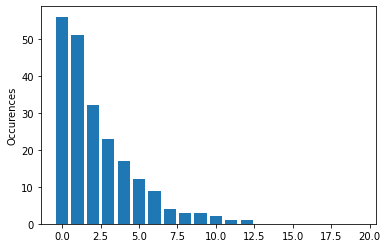

In [68]:
import matplotlib.pyplot as plt

plt.bar(list(range(subset_length)), num_occurrences/n_subsets)
plt.ylabel('Occurrences')
plt.show()

In [82]:
ingredients_subsets = []
n_subsets = 10
subset_length = 20
for _ in range(n_subsets):
#     subset_length = random.randint(12, 30)
    ingredients_subsets.append(random.sample(all_ingredients, subset_length))
ingredients_subsets

[['lemonjelly',
  'chimichurrisauce',
  'frozenblackenedcorn',
  'wholetoastedhazelnuts',
  'cubanellepepper',
  'dryredpeppers',
  "Campbell'sReadyToServeminestronesoup",
  'hashbrownpatty',
  'tarragon',
  'pastasaucewithmushrooms',
  'balkanstyleyogurt',
  'potatopierogi',
  'chilistarter',
  'instantmaltedmilkpowder',
  'cornflakes',
  "Durkee'ssauce",
  'garlic',
  'sourcreamsubstitute',
  'tamarindpowder',
  'garlic-flavormashedpotatoes'],
 ['grounddriedchile',
  'tamarindnectar',
  'hotketchup',
  'cremefraiche',
  'bakedbeanswithmolasses',
  'cipollinionion',
  'greenolives',
  'mozzarella-provolonecheeseblend',
  'rose-scentedgeraniumleaves',
  'beefeyeround',
  'tamarindpods',
  'monsterenergydrink',
  'sugar-freeshortbreadcookies',
  'yellowtailfishfillets',
  'glycerin',
  'Portugueserolls',
  'freshmango',
  'babyleeks',
  'apricothalvesinlightsyrup',
  'dumplingwrappers'],
 ['ouzoliqueur',
  'prunefilling',
  'cappuccino-flavoredyogurt',
  'Lifesaverscandies',
  'icewater

In [95]:
import numpy as np
ingredients_subsets = []
n_subsets = 100
subset_length = 20
for _ in range(n_subsets):
#     subset_length = random.randint(12, 30)
    ingredients_subsets.append(random.sample(all_ingredients, subset_length))
n = 20
num_occurrences = np.zeros(20)
for j, ingredients_list in enumerate(ingredients_subsets):
    ingredients_string = " ".join(ingredients_list)
    vector = vectorizer.transform([ingredients_string])[0]
    scalar_products = X.multiply(vector).sum(1)
    knn = np.squeeze(np.asarray(scalar_products.reshape((corpus_len)))).argsort()[-n:]
    all_overlapping = {}
    for nearest in knn:
        found_ingredients_indices = find(X[nearest])[1]
        for index in found_ingredients_indices:
            ingredient = vectorizer.get_feature_names()[index]
            if ingredient in my_ingredients_list:
                all_overlapping[ingredient] = all_overlapping.get(ingredient, 0) + 1
    occurrences = sorted(all_overlapping.values(), reverse=True)
    print(occurrences)
    for i, occurrence in enumerate(occurrences):
        num_occurrences[i] += occurrence
#     print(j + 1)
    
import matplotlib.pyplot as plt

plt.bar(list(range(subset_length)), num_occurrences/n_subsets)
plt.ylabel('Occurrences')
plt.show()

[10, 8, 7, 5, 5, 3, 2, 2, 1]
[4, 3, 3, 3, 2, 1, 1]
[10, 8, 6, 4, 4, 2, 1, 1]
[4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1]
[4, 4, 3, 2, 2, 1, 1]
[2, 1, 1, 1, 1, 1]
[5, 3, 3, 2, 2, 2, 1, 1]
[3, 3, 2, 2, 1, 1, 1, 1]
[7, 6, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1]
[8, 7, 5, 1, 1, 1]
[11, 7, 7, 4, 4, 2, 1, 1, 1, 1, 1, 1]
[2, 1, 1, 1]
[4, 3, 3, 2, 2, 1, 1, 1]


KeyboardInterrupt: 